In [30]:
import scipy as sp
from scipy.integrate import odeint
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
%matplotlib inline

In [162]:
def efeito_giroscopico(x, t, k, I_p, I, gama, Omega):
    
    # x = [alpha, betha, d(alpha)/dt, d(beta)/dt]
    
    A = sp.array([[0, 0, 1, 0],[0, 0, 0, 1], [-(k/I), 0, -c/I, (I_p/I)*Omega], [0, -(k/I), -(I_p/I)*Omega, -c/I]])
    f = [0, 0, (I-I_p)/I*gama*Omega**2*sp.cos(Omega*t), (I-I_p)/I*gama*Omega**2*sp.sin(Omega*t)]
    
    dxdt = A @ x + f
    
    return dxdt

In [163]:
#condicoes iniciais
alpha_0 = 0
dalphadt_0 = 0
beta_0 = 0
dbetadt_0 = 0
x0 = [alpha_0, beta_0, dalphadt_0, dbetadt_0]

tf = 100
t = sp.linspace(0, tf, 10000)

In [164]:
# parametros do sistema
k = 1
I_p = 1
I = 2
gama = 1
c = 1
Omega = range(0,50)

In [165]:
# o vetor ALPHA armazenara os valores maximos de alpha para cada frequencia de forcamento omega
ALPHA = [] #  vetor para armazenar alpha
for forcamento in Omega:
    sol = odeint(efeito_giroscopico, x0, t, args=(k, I_p, I, gama, forcamento, ))
    ALPHA.append(max(sol[500:1000,0])) # o intervalo foi escolhido como precaucao a algum transiente

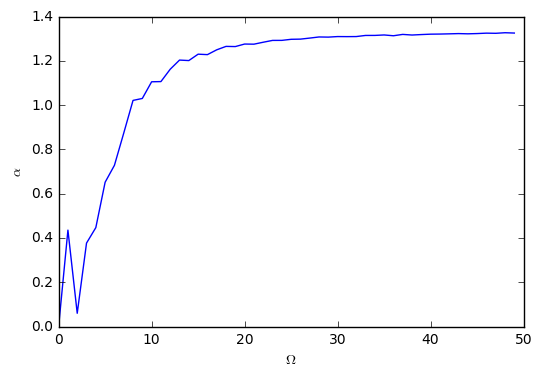

In [166]:
#desenhando a resposta de alpha x Omega
plt.plot(Omega, ALPHA)
plt.xlabel('$\Omega$')
plt.ylabel('$\\alpha$')

Retirando o amortecimento (c=0) e calculando o diagrama de Campbell

w3 = 0.571642397805
w1 = 1.00337077802


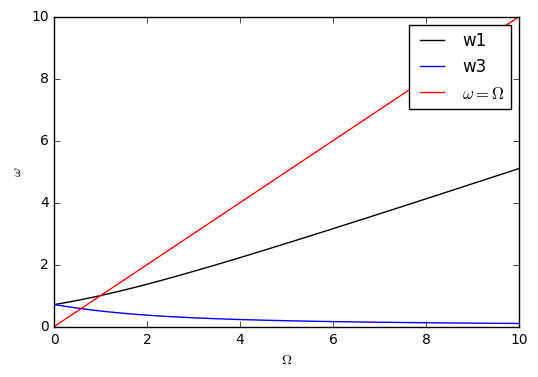

In [175]:
c = 0
Omega = sp.linspace(0,10, 100)

#frequencias naturais
w1 = (I_p/I*Omega+sp.sqrt((I_p/I)**2*Omega**2+4*(k/I)))/2
w3 = (-I_p/I*Omega+sp.sqrt((I_p/I)**2*Omega**2+4*(k/I)))/2

#determinando as interseçoes
for i in range(len(w1)):
    if abs(w1[i] - Omega[i])<5e-2:
        print('w1 =', w1[i])
    elif abs(w3[i] - Omega[i])<5e-2:
            print('w3 =', w3[i])

# desenhando o diagrama de Campbell
plt.plot(Omega, w1, 'k-', label='\omega1')
plt.plot(Omega, w3, 'b-', label='w3')
plt.plot(Omega, Omega,'r-', label='$\omega=\Omega$')
plt.xlabel('$\Omega$')
plt.ylabel('$\omega$')
plt.legend()

In [168]:
#calculando para w1 e w3
sol1 = odeint(efeito_giroscopico, x0, t, args=(k, I_p, I, gama, 1, ))
sol3 = odeint(efeito_giroscopico, x0, t, args=(k, I_p, I, gama, .57, ))

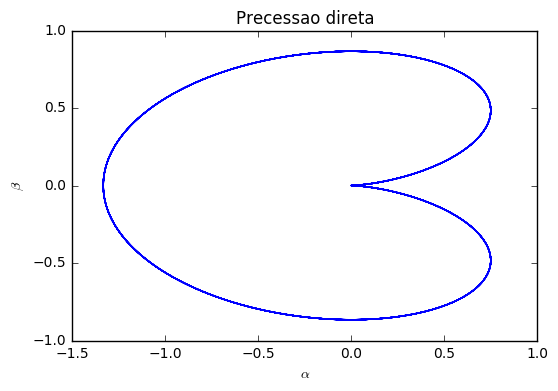

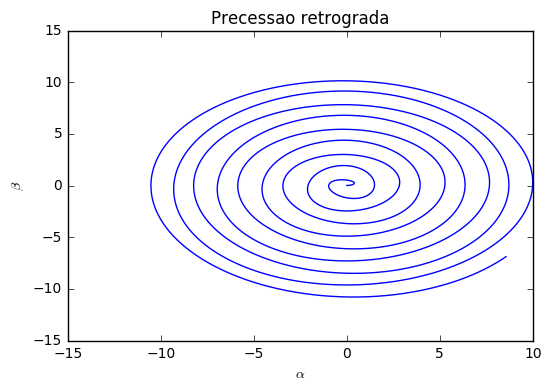

In [169]:
# desenhando resposta alpha x beta
plt.figure()
plt.title('Precessao direta')
plt.plot(sol1[:,0], sol1[:,1])
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')

plt.figure()
plt.title('Precessao retrograda')
plt.plot(sol3[:,0], sol3[:,1])
plt.xlabel('$\\alpha$')
plt.ylabel('$\\beta$')

In [170]:
# modificando a condicao inicial alpha 0
alpha_0 = sp.pi/3
x0 = [alpha_0, beta_0, dalphadt_0, dbetadt_0]

#solucao para Omega = 2
sol4 = odeint(efeito_giroscopico, x0, t, args=(k, I_p, I, gama, 2, ))

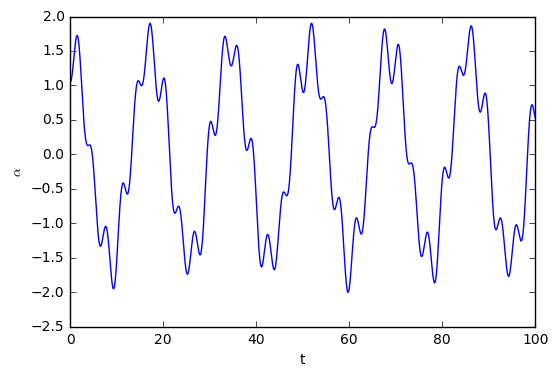

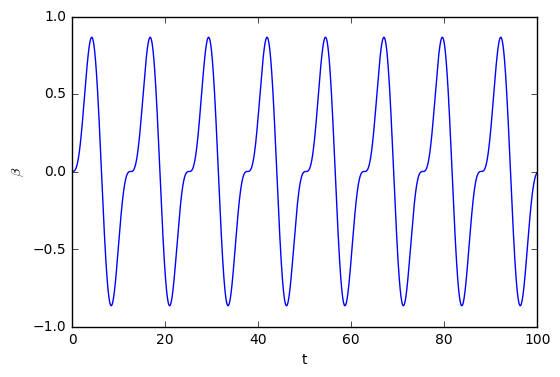

In [171]:
#desenhando a nova solucao (alpha x t e beta x t)
plt.figure()
plt.plot(t, sol4[:,0])
plt.ylabel('$\\alpha$')
plt.xlabel('t')

plt.figure()
plt.plot(t, sol1[:,1])
plt.xlabel('t')
plt.ylabel('$\\beta$')

In [172]:
#funcao criada para permitir interacao dos parametros e analisar como isso afeta a resposta do sistema
def interacao(k, I_p, I, gama, Omega):
    sol = odeint(efeito_giroscopico, x0, t, args=(k, I_p, I, gama, Omega, ))
    w1 = (I_p/I*Omega+sp.sqrt((I_p/I)**2*Omega**2+4*(k/I)))/2
    w3 = (-I_p/I*Omega+sp.sqrt((I_p/I)**2*Omega**2+4*(k/I)))/2
    print('w1 =', w1, 'rad/s')
    print('w3 =', w3, 'rad/s')
    plt.plot(t, sol[:,0])
    plt.xlabel('t')
    plt.ylabel('$\\alpha$')
    plt.show()

w1 = 6.9523970521 rad/s
w3 = 0.0898970520982 rad/s


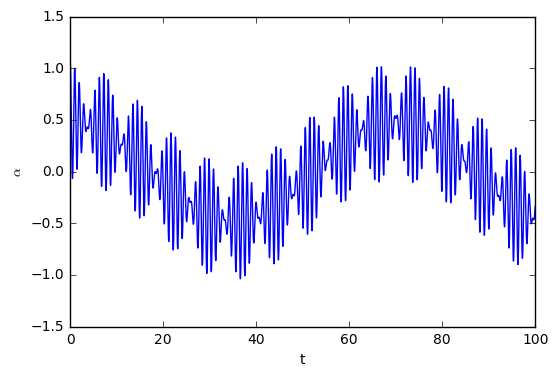

In [173]:
interact(interacao,  k=(0, 10, 1), I_p=(0, 20, 1), I=(1,20, 1), gama=(0, 10, 1), Omega=(0,10,.1))